In [1]:
def get_upper_folder(path):
    return '/'.join(path.split('/')[:-1])

In [24]:
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

train_dev_size = 0.002 # to have about 1k
add_to_dev = 5000
split_size = 0.5

random_seed = 42
np.random.seed(random_seed)
p = !pwd
p = get_upper_folder(p[0])

data_dir = os.path.join(p, 'search_based_nmt', 'data', 'raw_data')

%matplotlib inline

In [3]:
!ls $data_dir

en.dev.txt          en.train_ost.txt    he.train.txt        hewv.train.txt
en.new_dev.txt      en.train_search.txt he.train_dev.txt    train_half
en.new_test.txt     he.dev.txt          he.train_ost.txt    train_no_search
en.test.txt         he.new_dev.txt      he.train_search.txt train_octa
en.train.txt        he.new_test.txt     hewv.dev.txt        train_quarter
en.train_dev.txt    he.test.txt         hewv.test.txt


## Read all data

In [4]:
def  get_translations(part):
    translations = defaultdict(list)

    with open(os.path.join(data_dir, 'en.{}.txt'.format(part))) as f:
        en = [l.strip() for l in f]

    with open(os.path.join(data_dir, 'he.{}.txt'.format(part))) as f:
        he = [l.strip() for l in f]

    for x,y in zip(he, en):
        translations[x].append(y)
    return translations

In [5]:
translations_train = get_translations('train')
translations_dev = get_translations('dev')
translations_test = get_translations('test')

In [6]:
print ('train size', len(translations_train))
print ('test size', len(translations_test))
print ('dev size', len(translations_dev))

train size 296213
test size 986
dev size 3963


In [7]:
print ('intersection of train and dev:', len([k for k in translations_dev if k in translations_train]))
print ('intersection of train and test:', len([k for k in translations_test if k in translations_train]))

intersection of train and dev: 2216
intersection of train and test: 18


In [8]:
train_words = list(translations_train.keys())
dev_words = [k for k in translations_dev if k not in translations_train]
test_words = [k for k in translations_test if k not in translations_train]

In [9]:
print ('dev words with no intersections', len(dev_words))
print ('test words with no intersections', len(test_words))

dev words with no intersections 1747
test words with no intersections 968


(array([215745.,  43781.,  15404.,   7402.,   3983.,   2608.,   1776.,
          1262.,    858.,    648.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

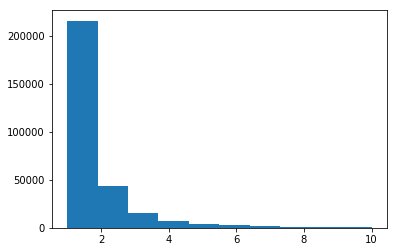

In [10]:
plt.hist([len(v) for k, v in translations_train.items()], range=(1, 10))

## Make dev

In [11]:
dev_data = []
for w in dev_words:
    for translation in translations_dev[w]:
        dev_data.append((w, translation))

np.random.shuffle(dev_data)

with open(os.path.join(data_dir, 'he.clear_dev.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in dev_data]))
    
with open(os.path.join(data_dir, 'en.clear_dev.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in dev_data]))

## Make test

In [12]:
test_data = []
for w in test_words:
    for translation in translations_test[w]:
        test_data.append((w, translation))

np.random.shuffle(test_data)

with open(os.path.join(data_dir, 'he.clear_test.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in test_data]))
    
with open(os.path.join(data_dir, 'en.clear_test.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in test_data]))

## Split train by keys

In [13]:
train_words = list(translations_train.keys())

In [14]:
len(train_words)

296213

### Split for train_dev

In [15]:
train, train_dev = train_test_split(train_words, test_size=train_dev_size, random_state=random_seed)

In [16]:
print ('len of train_dev', sum([len(translations_train[k]) for k in train_dev]))
print ('len of ost train', sum([len(translations_train[k]) for k in train]))

len of train_dev 975
len of ost train 495025


In [17]:
train_dev_data = []
for w in train_dev:
    for translation in translations_train[w]:
        train_dev_data.append((w, translation))

np.random.shuffle(train_dev_data)

with open(os.path.join(data_dir, 'he.train_dev.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_dev_data]))
    
with open(os.path.join(data_dir, 'en.train_dev.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_dev_data]))

### Split for search

In [18]:
train, train_search = train_test_split(train, test_size=split_size, random_state=random_seed)

In [19]:
print ('len of train_search', sum([len(translations_train[k]) for k in train_search]))
print ('len of ost train', sum([len(translations_train[k]) for k in train]))

len of train_search 246794
len of ost train 248231


## Make extra dev

In [29]:
train_search, extra_dev_words = train_test_split(train_search, test_size=add_to_dev, random_state=random_seed)

extra_dev = []
for w in extra_dev_words:
    for translation in translations_train[w]:
        extra_dev.append((w, translation))
extra_dev += dev_data
len(extra_dev)

10222

In [31]:
np.random.shuffle(extra_dev)

with open(os.path.join(data_dir, 'he.mode_dev.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in extra_dev]))
    
with open(os.path.join(data_dir, 'en.more_dev.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in extra_dev]))

## Make extra test

In [32]:
train_search, extra_test_words = train_test_split(train_search, test_size=add_to_dev, random_state=random_seed)

extra_test = []
for w in extra_test_words:
    for translation in translations_train[w]:
        extra_test.append((w, translation))
extra_test += test_data
len(extra_test)

9372

In [33]:
np.random.shuffle(extra_test)

with open(os.path.join(data_dir, 'he.mode_test.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in extra_test]))
    
with open(os.path.join(data_dir, 'en.more_test.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in extra_test]))

## Save search data

In [35]:
train_search_data = []
for w in train_search:
    for translation in translations_train[w]:
        train_search_data.append((w, translation))

np.random.shuffle(train_search_data)

with open(os.path.join(data_dir, 'he.train_search.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_search_data]))
    
with open(os.path.join(data_dir, 'en.train_search.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_search_data]))

## Save another part

In [21]:
train_no_search_data = []
for w in train:
    for translation in translations_train[w]:
        train_no_search_data.append((w, translation))

np.random.shuffle(train_no_search_data)

with open(os.path.join(data_dir, 'he.train_no_search.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_no_search_data]))
    
with open(os.path.join(data_dir, 'en.train_no_search.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_no_search_data]))

### Split half

In [22]:
train, train_half = train_test_split(train, test_size=split_size, random_state=random_seed)

In [23]:
print ('len of train_half', sum([len(translations_train[k]) for k in train_half]))
print ('len of ost train', sum([len(translations_train[k]) for k in train]))

len of train_half 124418
len of ost train 123813


In [24]:
train_half_data = []
for w in train_half:
    for translation in translations_train[w]:
        train_half_data.append((w, translation))

np.random.shuffle(train_half_data)

with open(os.path.join(data_dir, 'he.train_half.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_half_data]))
    
with open(os.path.join(data_dir, 'en.train_half.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_half_data]))

### Split quarter

In [25]:
train, train_quarter = train_test_split(train, test_size=split_size, random_state=random_seed)

In [26]:
print ('len of train_quarter', sum([len(translations_train[k]) for k in train_quarter]))
print ('len of ost train', sum([len(translations_train[k]) for k in train]))

len of train_quarter 62473
len of ost train 61340


In [27]:
train_quarter_data = []
for w in train_quarter:
    for translation in translations_train[w]:
        train_quarter_data.append((w, translation))

np.random.shuffle(train_quarter_data)

with open(os.path.join(data_dir, 'he.train_quarter.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_quarter_data]))
    
with open(os.path.join(data_dir, 'en.train_quarter.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_quarter_data]))

### Split octa

In [28]:
train, train_octa = train_test_split(train, test_size=split_size, random_state=random_seed)

In [29]:
print ('len of train_octa', sum([len(translations_train[k]) for k in train_octa]))
print ('len of ost train', sum([len(translations_train[k]) for k in train]))

len of train_octa 30664
len of ost train 30676


In [30]:
train_octa_data = []
for w in train_octa:
    for translation in translations_train[w]:
        train_octa_data.append((w, translation))

np.random.shuffle(train_octa_data)

with open(os.path.join(data_dir, 'he.train_octa.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_octa_data]))
    
with open(os.path.join(data_dir, 'en.train_octa.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_octa_data]))

In [31]:
train_ost_data = []
for w in train:
    for translation in translations_train[w]:
        train_ost_data.append((w, translation))

np.random.shuffle(train_ost_data)

with open(os.path.join(data_dir, 'he.train_ost.txt'), 'w') as f:
    f.write('\n'.join([x[0] for x in train_ost_data]))
    
with open(os.path.join(data_dir, 'en.train_ost.txt'), 'w') as f:
    f.write('\n'.join([x[1] for x in train_ost_data]))

In [32]:
!ls $data_dir

en.dev.txt                             he.test.txt
en.new_dev.txt                         he.train.txt
en.new_test.txt                        he.train_dev.txt
en.test.txt                            he.train_half.txt
en.train.txt                           he.train_no_search.txt
en.train_dev.txt                       he.train_octa.txt
en.train_half.txt                      he.train_ost.txt
en.train_no_search.txt                 he.train_quarter.txt
en.train_octa.txt                      he.train_search.txt
en.train_ost.txt                       he2en_ws-dev-00000-of-00001
en.train_quarter.txt                   he2en_ws-train-00000-of-00001
en.train_search.txt                    hewv.dev.txt
he-to-en.translit.results.txt          hewv.test.txt
he.dev.txt                             hewv.train.txt
he.new_dev.txt                         translit_he_to_en-dev-00000-of-00001
he.new_test.txt                        translit_he_to_en-train-00000-of-00001
